# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта**

Выявить определяющие успешность игры закономерности.

**Ход исследования**

- Обзор данных;
- Предобработка данных, включая дополнительные расчеты;
- Исследовательский анализ данных;
- Составление портрета пользователя;
- Проверка гипотез.

**Описание данных**

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Ознакомление с данными

### Подключим библиотеки

In [ ]:
# Импортируем необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Считаем файл с данными

In [ ]:
# Прочитаем файл с данными, сохраним в games.
try:
    games = pd.read_csv('/datasets/games.csv')


except:
    games = pd.read_csv('games.csv')

### Изучим общую инфрмацию о датафрейме

In [ ]:
# Выведем первые 10 строк датафрейма.
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# Выведем общую информацию о датафрейме.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Краткий обзор числовых данных датафрейма.
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**
- Датафрейм состоит из 16715 записей и 11 стобцов с данными.
- Уже в первых десяти строках датафрейма обнаружено большое количество пропусков в столбцах *Critic_Score*, *User_Score*,	*Rating*.
- В столбце *Year_of_Release* задан неправильный тип данных (**float64**), необходимо преобразовать тип данных к целочисленному (**int**).
- Столбец *User_Score* имеет тип данных (**object**), согласно наполнению столбца необходимо преобразовать к (**float64**).

## Подготовка данных

### Приведём названия столбцов к нижнему регистру

In [ ]:
# Для удобства приведём названия к нижнему регистру.
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработаем пропуски в данных

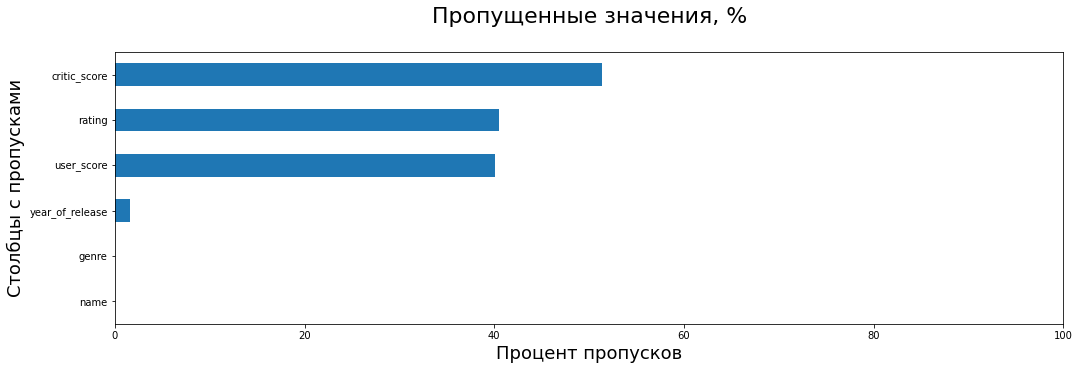

In [ ]:
# Создадим график для наглядного отображения пропусков

def pass_value_barh(games):
    try:
        (
            (games.isna().mean() * 100)
            .to_frame()
            .rename(columns = {0: 'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind = 'barh', figsize = (17,5), legend = False)

        );
        plt.title('Пропущенные значения, %' + "\n", fontsize=22)
        plt.xlabel('Процент пропусков', fontsize=18)
        plt.ylabel('Столбцы с пропусками',fontsize=18)
        plt.xlim(0, 100)
        plt.show()
    except:
        print('пропусков нет или произошла ошибка ')

pass_value_barh(games)

In [ ]:
# Проверим датафрейм на пропуски.
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**name**

In [ ]:
# В столбце 'name' имеются два пропущенных значения.
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце найдено два пропущенных значения. Удалим их, т.к. дальнейшая работа с такими данными не возможна.

In [ ]:
# Удалим строки с пропусками в 'name', т.к. дальнешая работа с такими строками невозможна.
games.dropna(subset=['name'], inplace=True)

**year_of_release**

In [ ]:
# В столбце 'year_of_release' обнаружено 269 пропущенных значения.
games['year_of_release'].isna().sum()

269

В столбце обнаружено 269 пропусков. Так же удалим строки с пропусками, т.к. они не пригодны для дальшейшего анализа.

In [ ]:
# Удалим строки с пропусками в 'year_of_release', т.к. дальнешая работа с такими строками невозможна.
games.dropna(subset=['year_of_release'], inplace=True)

**critic_score**

In [ ]:
# В столбце 'critic_score' обнаружено 8461 пропущенных значений.
games['critic_score'].isna().sum()

8461

Заполним пропуски индикаторным значением - заглушкой, чтобы в дальнейшем можно было легко определить, где значения были пропущены, но при этом не удалять эти строки полностью.

In [ ]:
# Заполним пропуски заглушкой "-1", чтобы не искажать данные.
games['critic_score'].fillna(-1, inplace=True)

In [ ]:
games['critic_score'].value_counts()

-1.0     8461
 70.0     252
 71.0     248
 75.0     240
 80.0     235
         ... 
 20.0       3
 29.0       3
 13.0       1
 17.0       1
 21.0       1
Name: critic_score, Length: 82, dtype: int64

**user_score**

In [ ]:
# В столбце 'user_score' обнаружено 6605 пропущенных значений.
games['user_score'].isna().sum()

6605

In [ ]:
# При этом есть странное значение 'tbd', из-за которого тип данных столбца (object)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# Проверим сколько строк с таким значением.
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Строк с таким значением 2376.<br/>
Аббревиатура **tbd** расшифровывается как **To Be Determined**, и означает, что оценка ещё не определена. И соответственно это значение можно считать за пропуск. Заполним пропуски и строки с таким значением индикаторным значением-заглушкой.

In [ ]:
# Заполним пропуски заглушкой "-1", чтобы не искажать данные.
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].fillna(-1)

**rating**

In [ ]:
# В столбце 'rating' обнаружено 6676 пропущенных значений.
games['rating'].isna().sum()

6676

В столбце обнаружены пропуски. Избавимся от них, заполнив надписью "unrated" - без рейтинга.

In [ ]:
# Заполним пропуски надписью "unrated".
games['rating'] = games['rating'].fillna('unrated')

### Изменим типы данных столбцов

In [ ]:
# Изменим тип данных на целочисленный, т.к. год не может быть с дробной частью.
games['year_of_release'] = games['year_of_release'].astype('int')

In [ ]:
# Преобразуем тип данных столбца к (float), т.к. в оценках пользователей есть дробная часть.
games['user_score'] = games['user_score'].astype('float')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Проверим датасет на дубликаты

Проверим датасет на наличие явных дубликатов.

In [ ]:
games.duplicated().sum()

0

Явных дубликатов не найдено.

Проверим датасет на наличие не явных дубликатов в столбцах *name*, *platform* и *year_of_release*.

In [ ]:
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Найдено две одинаковые записи. Оставим только одну.

In [ ]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [ ]:
display(games.loc[games.duplicated(subset=['name', 'platform'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


Дубликаты были удалены, в оставшихся случаях года релиза игр различаются.

###  Добавим столбец с суммарными продажами во всех регионах

In [ ]:
# Создадим столбец total_sales, суммирующий продажи по регионам.
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unrated,31.38


**Вывод:**<br/>
В ходе подготовки данных были проведены следующие работы:
- Названия столбцов приведены к нижнему регистру.
- Пропуски в столбцах *name* и *year_of_release* удалены, так как отсутствие этих данных делает их использование невозможным.
- Пропуски в столбцах *critic_score* и *user_score* заполнены индикаторным значением-заглушкой (-1) для сохранения возможности их использования в дальнейшем анализе. Значение "tbd" в *user_score* также интерпретировано как пропуск и заменено индикатором.
- Пропуски в столбце *rating* заполнены значением "unrated", что соответствует отсутствию рейтинга.
- Тип данных столбца *year_of_release* изменен на **int**, так как этот столбец содержит только год и не требует дробной части.
- Тип данных столбца *user_score* изменен с **object** на **float**, поскольку значения содержат дробную часть.
- Проведена проверка на наличие явных и не явных дубликатов. Из двух найденых неявных дубликатов оставлен один.
- Добавлен столбец *total_sales* с суммарными продажами во всех регионах.

Пропуски в столбцах *name* и *year_of_release* могли возникнуть из-за технического сбоя при выгрузке данных или вследствие человеческой ошибки.<br/>
Часть пропущенных значений в *critic_score* и *user_score* также могла быть вызвана техническими сбоями, но возможно, что игры с отсутствующими оценками не привлекли внимание критиков и пользователей.

## Исследовательский анализ данных

### Распределение количества релизов по годам

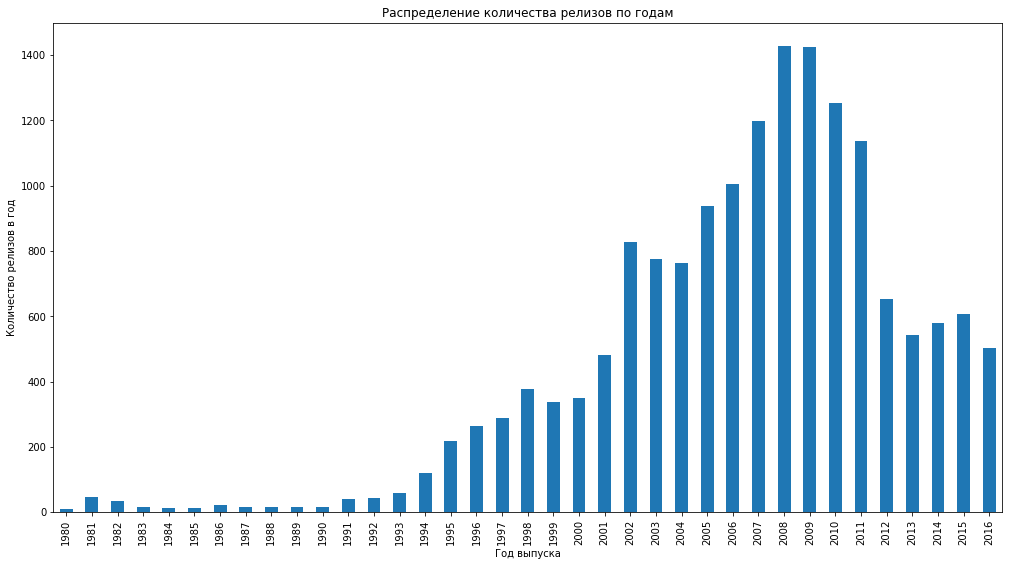

In [ ]:
# Построим столбчатую диаграмму.
games.groupby('year_of_release')['name'].agg('count').plot(
    kind='bar',
    figsize=(17, 9),
    title='Распределение количества релизов по годам',
    xlabel='Год выпуска',
    ylabel='Количество релизов в год'
)
plt.show()

In [ ]:
# Выведем количество релизов.
games.groupby('year_of_release')['name'].agg('count')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**Вывод:**<br/>
До 1994 года количество выпускаемых игр в год не превышало 60 релизов. Начиная с 1994 года, количество выпусков стало быстро расти, вероятно, благодаря росту числа игровых платформ. Значительный скачок произошёл в 2002 году, когда количество релизов увеличилось до 829. Пик выпуска игр пришёлся на 2008 и 2009 годы, когда было выпущено более 1400 игр в год. После 2012 года количество выпускаемых игр начало сокращаться, что может быть связано с переходом части рынка на мобильные платформы и изменением стратегии разработчиков.<br/>
Основной акцент следует делать на периоде с **2012 по 2016** год, чтобы понять текущие тренды и прогнозировать их продолжение на 2017 год.

### Исследование продаж по платформам

#### Количество релизов на платформах по годам

Построим сводную таблицу с суммарным количеством выпущенных игр по платформам и годам.

In [ ]:
# Строим сводную таблицу
games_years = (
    games.pivot_table(
        index='platform',
        columns='year_of_release',
        values='name',
        aggfunc='count',
        fill_value=0,
        margins=True
    )
    .reset_index()
)

pd.set_option('display.max_columns', None) # Отобразим все столбцы

games_years

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2121
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Выведем суммарное кол-во релизов за каждый год.
games_years[games_years['platform'] == 'All']

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
31,All,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,652,544,581,606,502,16443


In [ ]:
# Выведем топ 8 платформ по количеству релизов.
games_years[['platform', 'All']].sort_values(by='All', ascending=False).head(9)

year_of_release,platform,All
31,All,16443
16,PS2,2127
4,DS,2121
17,PS3,1305
26,Wii,1286
28,X360,1232
19,PSP,1193
15,PS,1190
13,PC,957


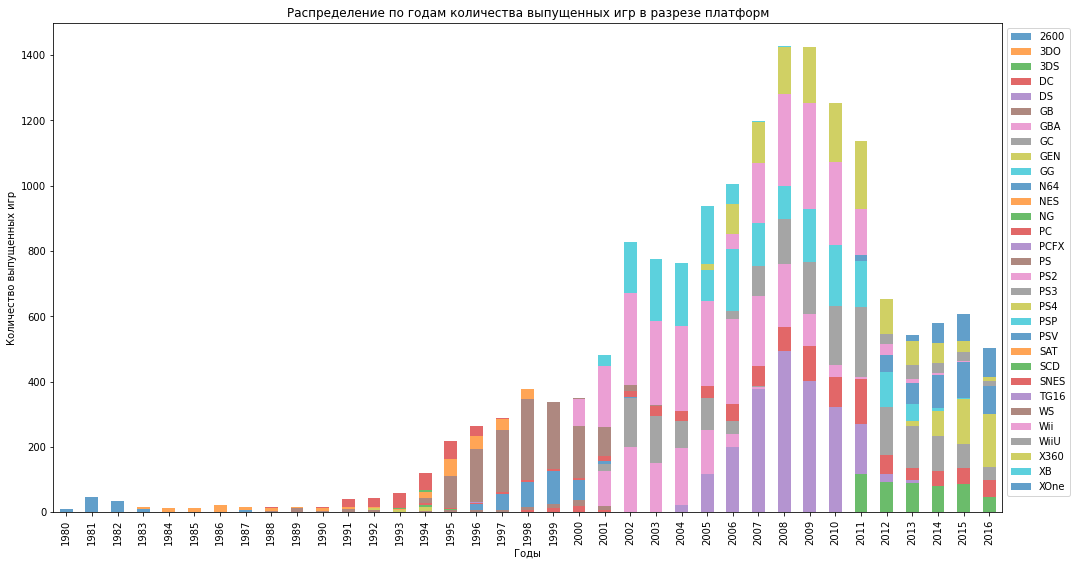

In [ ]:
# Построим столбчатую диаграмму с кол-вом выпущенных игр по годам
#в разрезе различных платформ.
fig, ax = plt.subplots(figsize=(17, 9))

# Построение сводной таблицы и столбчатой диаграммы
games.pivot_table(
    index='platform',
    columns='year_of_release',
    values='name',
    aggfunc='count'
).T.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    alpha=0.7
)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Годы')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение по годам количества выпущенных игр в разрезе платформ')

plt.show()

**Вывод:**
- Больше всего игр выпускалось в период с 2002 по 2011 года.
- Лидирующие платформы: PS2, DS, PS3, Wii, X360.

#### Продажи игр по платформам

Определим топ 7 платформ с наибольшими суммарными продажами.

In [ ]:
(
games.groupby('platform')
      .sum()[['total_sales']]
      .reset_index()
      .sort_values(by='total_sales', ascending=False)
      .head(7)
)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14


Построим распределение продаж по годам у топ 7 платформ по суммарным продажам.

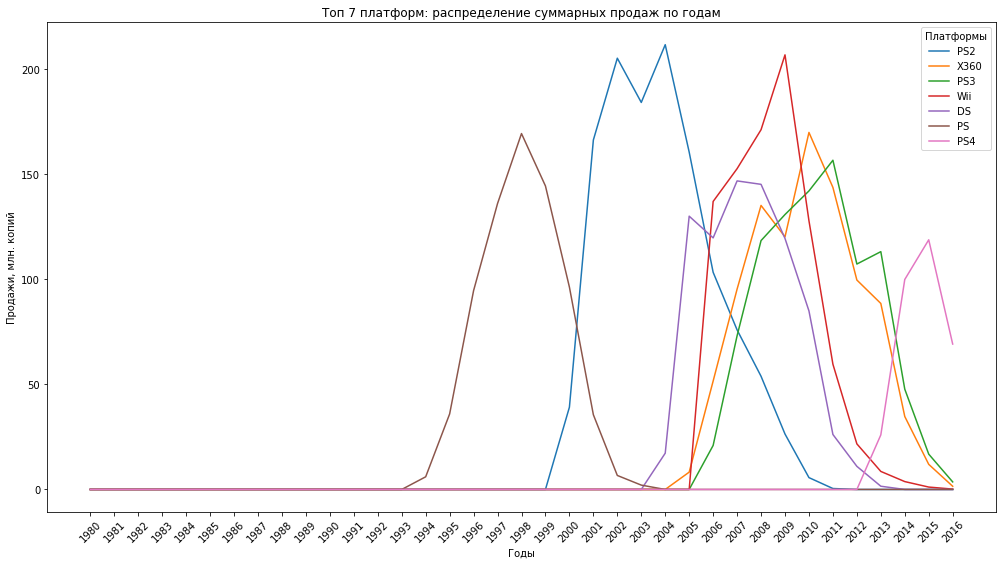

In [ ]:
# Создаем сводную таблицу продаж по платформам за весь период
top_sales = games.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

# Строим график продаж для топ-7 платформ по годам
ax = top_sales[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']].plot(
    xticks=top_sales.index,
    figsize=(17, 9),
    rot=45,
    title='Топ 7 платформ: распределение суммарных продаж по годам',
    xlabel='Годы',
    ylabel='Продажи, млн. копий'
)
ax.legend(title='Платформы')

**Вывод:**<br/>
В среднем, жизненный цикл игровой платформы составляет около 10 лет. Для прогнозирования продаж на следующий год важно анализировать данные за последние 5 лет. Особое внимание следует уделить платформам, которые демонстрируют стабильный рост или остаются на пике продаж в течение этого времени, поскольку они имеют наибольший потенциал для успешных продаж в будущем.

#### Продажи за последние 5 лет

Проанализируем данные о продажах за последние 5 лет (2011-2016).

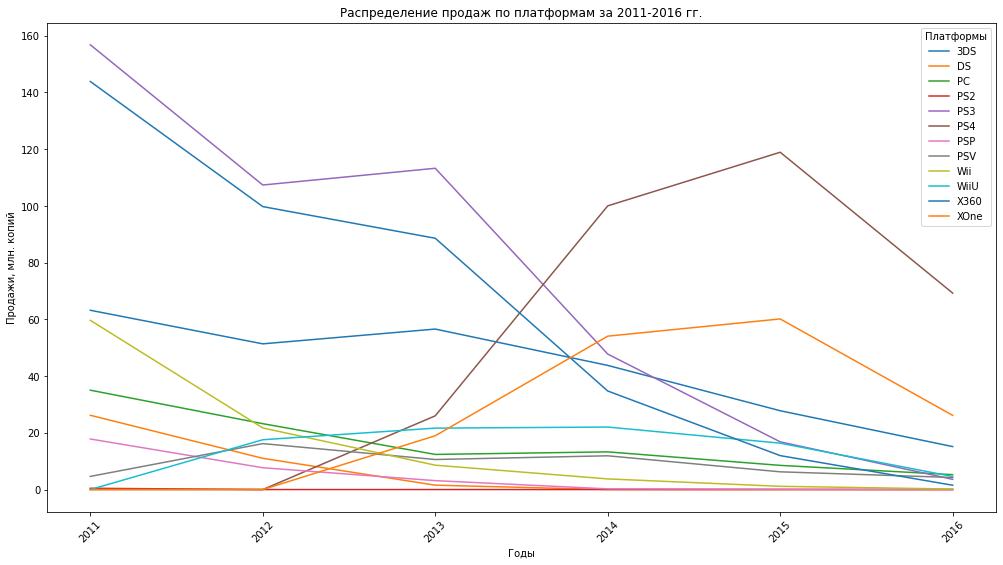

In [ ]:
# Создаем сводную таблицу продаж по платформам с 2011 года
games_sales = games.query('year_of_release >= 2011').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

ax = games_sales.plot(
    xticks=games_sales.index,
    figsize=(17, 9),
    rot=45,
    title='Распределение продаж по платформам за 2011-2016 гг.',
    xlabel='Годы',
    ylabel='Продажи, млн. копий'
)

ax.legend(title='Платформы')

**Вывод:**<br/>
На основе данных за 2011–2016 годы, платформы PS4 и XOne демонстрируют наибольший потенциал для дальнейших продаж в 2017 году, так как их жизненный цикл находится на подъеме, и они продолжают расти. Остальные платформы, такие как PS3, X360, и Wii, показывают явное снижение продаж, что свидетельствует о завершении их жизненного цикла.

#### Анализ продаж перспективных платформ

В предыдущем разделе мы определили, что перспективными игровыми платформами остаются PS4, PS3, XOne, X360, WiiU и 3DS, а актуальный период исследования - 5 лет.<br/>
Построим диаграммы размаха (boxplot) для выбранных актуальных платформ за выбранное время.

In [ ]:
# Отфильтруем данные: оставим только игры, выпущенные с 2011 года, и относящиеся к актуальным платформам
games_top = games.query(
    'year_of_release >= 2011 & platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]'
)
games_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unrated,14.60


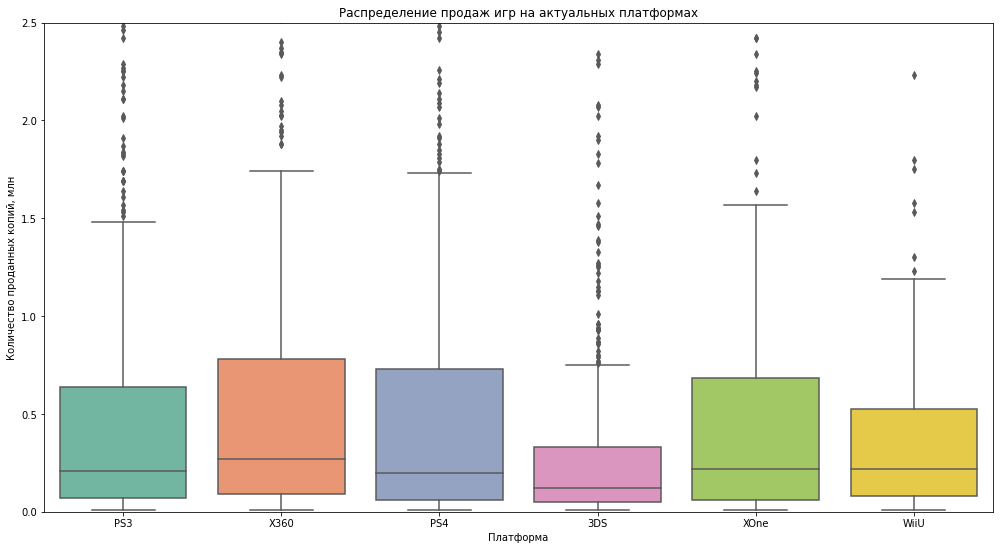

In [ ]:
# Построим диаграммы размаха для продаж игр на актуальных платформах
plt.figure(figsize=(17, 9))

sns.boxplot(
    x='platform',
    y='total_sales',
    data=games_top,
    palette='Set2'
).set(
    ylim=(0, 2.5),
    ylabel='Количество проданных копий, млн',
    xlabel='Платформа',
    title='Распределение продаж игр на актуальных платформах'
)

plt.show()

In [ ]:
# Построим сводную таблицу с суммой, средним, медианой, стандартным отклонением и количеством продаж по платформам
games_top.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc=['sum', 'mean', 'median', 'std', 'count']
).sort_values(
    ('sum', 'total_sales'),
    ascending=False
)

,sum,mean,median,std,count
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
PS3,445.56,0.630212,0.21,1.452228,707
X360,380.38,0.763815,0.27,1.637090,498
PS4,314.14,0.801378,0.20,1.609456,392
3DS,257.81,0.503535,0.12,1.441271,512
XOne,159.32,0.645020,0.22,1.036139,247
WiiU,82.19,0.559116,0.22,1.058836,147


**Вывод:**<br/>
К лидерам по продажам за актуальный период (2011-2016 гг.) относятся PS4, PS3 и X360. Медианные значения продаж смещены к нижнему краю и варьируются от 0.2 до 0.3 — то есть на всех платформах выходит много игр с относительно небольшими продажами. При этом везде есть небольшое количество бестселлеров, продажи которых могут многократно превышать обычные значения.

#### Влияние отзывов на продажи игр

Посмотрим, как влияют оценки пользователей и критиков на продажи игр.

Для примера выберем одну из популярных платформ - **PS4**.

Подсчитаем коэффициент корреляции между глобальными продажами и оценками критиков для платформы **PS4**.

In [ ]:
# Отфильтруем данные: выберем только данные для платформы PS4 и исключим записи с пропущенными оценками оценками (-1)
games_select = games_top.query('platform == "PS4" & critic_score != -1 & user_score != -1')

# Вычислим корреляции
print(f'Корреляция между оценкой критиков и продажами: {games_select.critic_score.corr(games_select.total_sales):.2f}')
print(f'Корреляция между оценкой пользователей и продажами: {games_select.user_score.corr(games_select.total_sales):.2f}')
print(f'Корреляция между оценками критиков и пользователей: {games_select.critic_score.corr(games_select.user_score):.2f}')


Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.03
Корреляция между оценками критиков и пользователей: 0.56


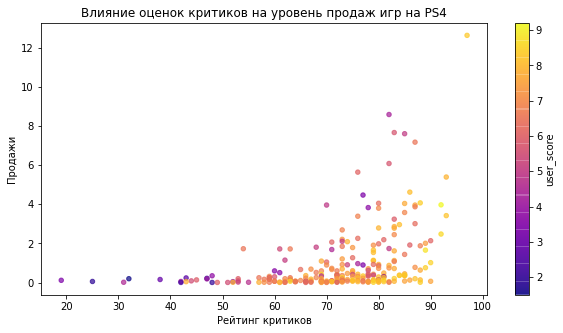

In [ ]:
# Построим график рассеяния "Влияние оценок критиков на уровень продаж".
games_select.plot.scatter(
    'critic_score',
    'total_sales',
    figsize=(10, 5),
    alpha=0.7,
    c='user_score',
    colormap='plasma',
    sharex=False
)

plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж игр на PS4')

plt.show()

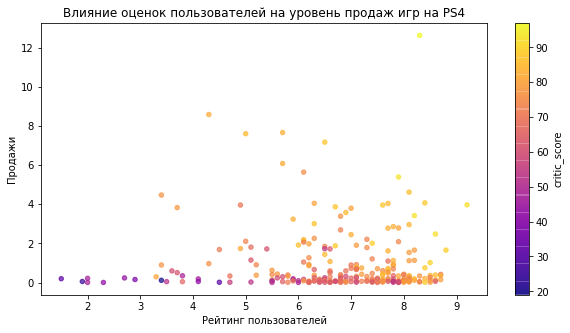

In [ ]:
# Построим график рассеяния "Влияние оценок пользователей на уровень продаж".
games_select.plot.scatter(
    'user_score',
    'total_sales',
    figsize=(10, 5),
    alpha=0.7,
    c='critic_score',
    colormap='plasma',
    sharex=False
)

plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж игр на PS4')

plt.show()

Распределение данных указывает на то, что оценки критиков имеют большее влияние на продажи, чем оценки пользователей, хотя и эта связь не идеальна и имеет значительные отклонения. Для прогнозирования продаж можно полагаться на оценки критиков, тогда как пользовательские оценки имеют слабую и обратную корреляцию с продажами.

 Посмотрим на величину корреляции для других популярных платформ:

3DS
Корреляция между оценкой критиков и продажами: 0.17
Корреляция между оценкой пользователей и продажами: 0.15
Корреляция между оценками критиков и пользователей: 0.91
------------------------------------------------------------


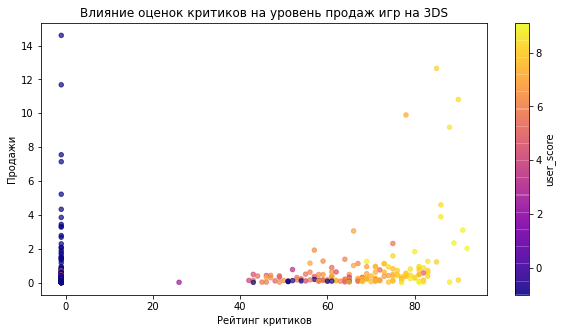

PS3
Корреляция между оценкой критиков и продажами: 0.32
Корреляция между оценкой пользователей и продажами: 0.23
Корреляция между оценками критиков и пользователей: 0.79
------------------------------------------------------------


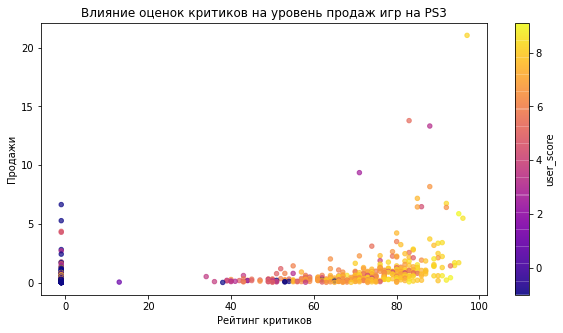

WiiU
Корреляция между оценкой критиков и продажами: 0.30
Корреляция между оценкой пользователей и продажами: 0.26
Корреляция между оценками критиков и пользователей: 0.86
------------------------------------------------------------


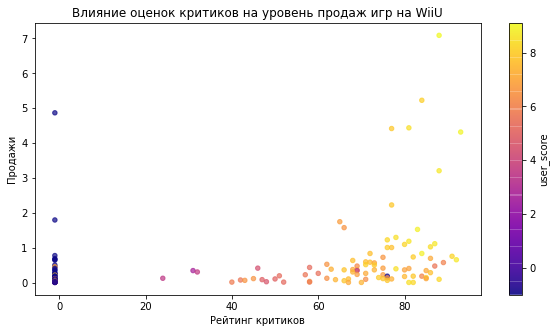

X360
Корреляция между оценкой критиков и продажами: 0.31
Корреляция между оценкой пользователей и продажами: 0.18
Корреляция между оценками критиков и пользователей: 0.74
------------------------------------------------------------


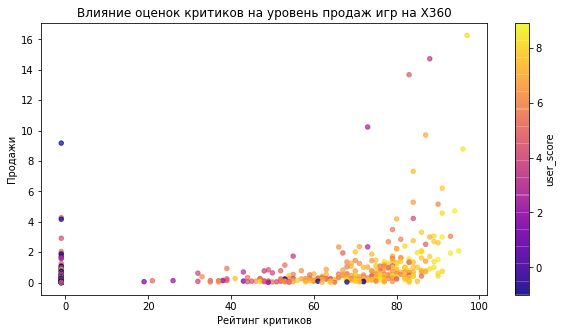

XOne
Корреляция между оценкой критиков и продажами: 0.27
Корреляция между оценкой пользователей и продажами: 0.12
Корреляция между оценками критиков и пользователей: 0.78
------------------------------------------------------------


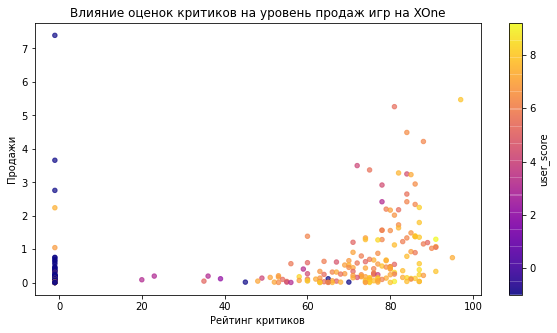

In [ ]:
platforms = ['3DS', 'PS3', 'WiiU', 'X360', 'XOne']

for p in platforms:
    print(p)
    games_select = games_top.query('platform == @p')

    # Корреляции
    print(f'Корреляция между оценкой критиков и продажами: {games_select.critic_score.corr(games_select.total_sales):.2f}')
    print(f'Корреляция между оценкой пользователей и продажами: {games_select.user_score.corr(games_select.total_sales):.2f}')
    print(f'Корреляция между оценками критиков и пользователей: {games_select.critic_score.corr(games_select.user_score):.2f}')
    print('--' * 30)

    # Построение графика рассеяния
    games_select.plot.scatter(
        'critic_score',
        'total_sales',
        figsize=(10, 5),
        alpha=0.7,
        c='user_score',
        colormap='plasma',
        sharex=False
    )
    plt.xlabel('Рейтинг критиков')
    plt.ylabel('Продажи')
    plt.title(f'Влияние оценок критиков на уровень продаж игр на {p}')
    plt.show()

**Вывод:**<br/>
На всех платформах, кроме PS4, корреляция между оценками критиков и продажами колеблется в диапазоне от слабой до умеренной, что указывает на некоторое влияние критических оценок на успех продаж. Влияние пользовательских оценок на продажи, как правило, слабее.

#### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам. Анализ будем проводить на примере актуальных платформ в промежутке 2011-2016гг.

In [ ]:
# Создаем сводную таблицу продаж по жанрам и платформам, с общей суммой продаж
genre_sales = (
    games_top.pivot_table(
        index='genre',
        columns='platform',
        values='total_sales',
        aggfunc='sum',
        margins=True  # Добавляем общий итог для строк и столбцов
    )
    .fillna(0)  # Заполняем отсутствующие значения нулями
    .sort_values(by='All', ascending=False)  # Сортируем таблицу по общей сумме продаж
)

genre_sales

platform,3DS,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,
All,257.81,445.56,314.14,82.19,380.38,159.32,1639.40
Action,57.84,159.59,96.10,19.07,109.92,37.31,479.83
Shooter,1.22,100.16,88.56,6.01,118.26,60.33,374.54
Sports,6.15,62.44,55.61,3.16,55.86,26.74,209.96
Role-Playing,84.20,40.88,28.99,2.89,21.32,10.55,188.83
Misc,10.99,14.13,8.19,12.46,29.91,7.43,83.11
Racing,14.87,18.07,12.14,7.87,17.48,9.79,80.22
Platform,32.53,11.74,7.69,21.53,4.44,0.93,78.86
Fighting,10.56,20.77,8.65,6.27,12.14,2.45,60.84


Визуализируем суммарные продажи в разрезе жанров.

<AxesSubplot:title={'center':'Суммарные продажи в разрезе жанров'}, xlabel='Жанр', ylabel='Количество проданных копий, млн'>

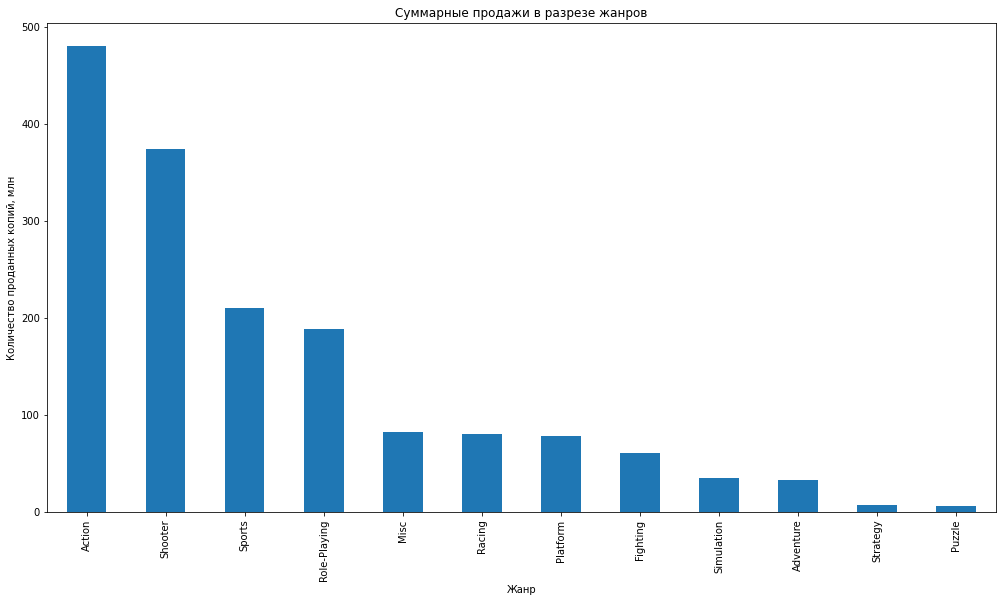

In [ ]:
# Построим график суммарных продаж по жанрам.
(
    games_top
    .groupby('genre')['total_sales']
    .agg('sum')
    .sort_values(ascending=False)
    .plot(
        kind='bar',
        figsize=(17, 9),
        title='Суммарные продажи в разрезе жанров',
        ylabel='Количество проданных копий, млн',
        xlabel='Жанр'
    )
)

In [ ]:
games_top.groupby('genre')['total_sales']\
    .agg('sum')\
    .sort_values(ascending=False)

genre
Action          479.83
Shooter         374.54
Sports          209.96
Role-Playing    188.83
Misc             83.11
Racing           80.22
Platform         78.86
Fighting         60.84
Simulation       35.48
Adventure        33.61
Strategy          7.17
Puzzle            6.95
Name: total_sales, dtype: float64

В топ по суммарным продажам вошли Экшены (Action), Шутеры (Shooter) и Спортивные игры (Sports) с РПГ (Role-Playing). А самые низкие суммарные продажи оказались у: Приключений (Adventure), Стратегий (Strategy) и Головоломок (Puzzle).

Построим аналогичный график для среднего количества продаж.

<AxesSubplot:title={'center':'Средние продажи в разрезе жанров'}, xlabel='Жанр', ylabel='Количество проданных копий, млн'>

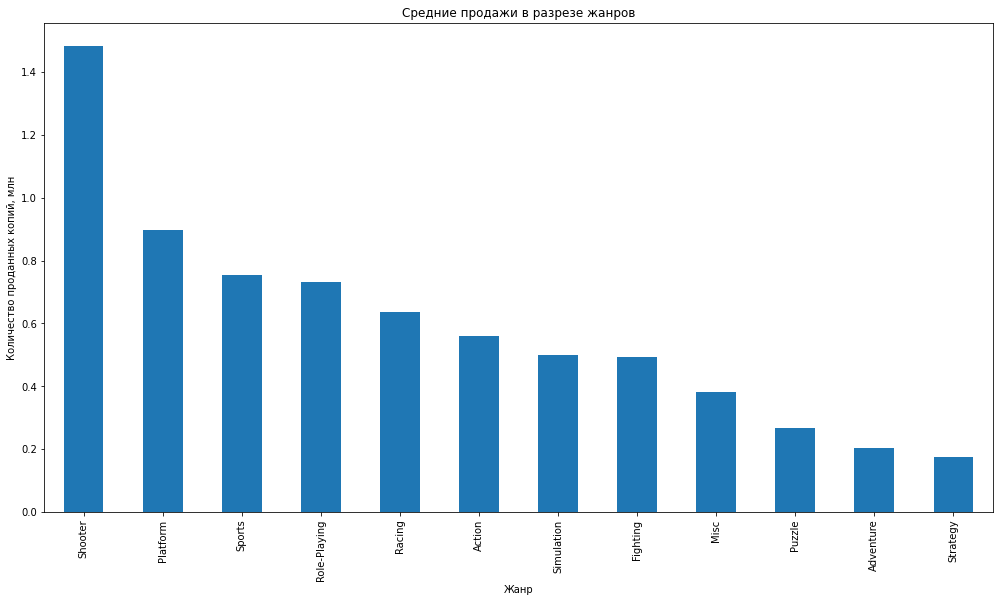

In [ ]:
# Построим график.
(
    games_top
    .groupby('genre')['total_sales']
    .agg('mean')
    .sort_values(ascending=False)
    .plot(
        kind='bar',
        figsize=(17, 9),
        title='Средние продажи в разрезе жанров',
        ylabel='Количество проданных копий, млн',
        xlabel='Жанр'
    )
)

In [ ]:
games_top.groupby('genre')['total_sales']\
    .agg('mean')\
    .sort_values(ascending=False)

genre
Shooter         1.480395
Platform        0.896136
Sports          0.755252
Role-Playing    0.731899
Racing          0.636667
Action          0.559895
Simulation      0.499718
Fighting        0.494634
Misc            0.381239
Puzzle          0.267308
Adventure       0.204939
Strategy        0.174878
Name: total_sales, dtype: float64

Теперь в первой тройке по средним продажам: Шутеры (Shooter), Платформеры (Platfom) и Спортивные игры (Sports)

**Вывод:**<br/>
В ходе исследовательского анализа нами были получены следующие данные:<br/>
- До 1994 года выпускалось менее 60 игр в год, но с 1994 года количество релизов резко возросло, достигнув пика в 2008-2009 годах с более чем 1400 играми в год. После 2012 года количество игр начало сокращаться, что, вероятно, связано с переходом на мобильные платформы и изменением стратегий разработчиков.
- К лидерам по продажам за актуальный период (2011-2016 гг.) относятся платформы От Sony: PS4, PS3, и от Microsoft — X360. Затем идут Nintendo 3Ds, WiiU и XBoxOne
- Жизненный цикл платформы составляет примерно 10 лет.<br/>
- Платформы находящиеся на пике популярности на конец периода: PlayStation 4, XBox One.Остальные платформы уже успели преодолеть пик своей популярности: 3D, PS3, WiiU, X360.<br/>
- В топ по суммарным продажам вошли Экшены, Шутеры и Спортивные игры, а наименьшие продажи у Приключений, Стратегий и Головоломок. По средним продажам лидируют Шутеры, Платформеры и Спортивные игры.

## Исследование продаж по рынкам

#### Топ-5 популярных платформ для каждого региона

Определим самые популярные платформы для каждого региона.

In [ ]:
# Создаем сводную таблицу, которая суммирует продажи по платформам в разных регионах
games_top.pivot_table(
    index='platform',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum' # Суммируем продажи по каждой платформе
).apply(
    lambda col: col / col.sum(), # Делим значение на общую сумму столбца
    axis=0
).style.format("{:.1%}") # Форматируем значения в таблице, чтобы они отображались в процентах

,eu_sales,jp_sales,na_sales
platform,,,
3DS,11.0%,55.1%,11.5%
PS3,29.2%,27.0%,23.4%
PS4,25.2%,8.7%,15.2%
WiiU,4.5%,7.1%,5.3%
X360,20.9%,1.8%,31.6%
XOne,9.2%,0.2%,13.0%


Европейские пользователи отдают предпочтение консолям от Sony: PS3 (29.2%) и PS4 (25.2%)<br/>
Геймеры из Японии отдают предпочтение консолям от Nintendo: 3DS (55.1%)<br/>
Американские геймеры выбирают игры для консолей от Microsoft и Sony: X360 (31.6%), PS3 (23.4%)

#### Топ-5 популярных жанров для каждого региона

Определим самые популярные жанры игр для каждого региона.

In [ ]:
# Создаем сводную таблицу, которая суммирует продажи по жанрам в разных регионах
games_top.pivot_table(
    index='genre',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum' # Суммируем продажи по каждому жанру
).apply(
    lambda col: col / col.sum(), # Делим значение на общую сумму столбца
    axis=0
).style.format("{:.1%}") # Форматируем значения в таблице, чтобы они отображались в процентах

,eu_sales,jp_sales,na_sales
genre,,,
Action,30.7%,27.2%,28.1%
Adventure,2.1%,2.9%,1.8%
Fighting,2.7%,5.5%,4.1%
Misc,4.1%,5.3%,6.0%
Platform,4.8%,6.0%,4.8%
Puzzle,0.5%,1.1%,0.3%
Racing,6.6%,3.0%,4.0%
Role-Playing,8.6%,31.4%,9.4%
Shooter,23.9%,6.4%,25.6%


В тройку наиболее популярных жанров у игроков из Европы вошли Action (30.7%), Shooter (23.9%) и Sports (13.8%).<br/>
У японских пользователей на первом месте Ролевые игры (Role-Playing 31.4%), затем с небольшим отрывом идут Экшен игры (27.2%).<br/>
У игроков из Северной Америки в топе также, как и у игроков из Европы — Экшены (28.1%), затем идут Шутеры (25.6%) и Спортивные тайтлы (13.9%).<br/>
Остальные жанры не пользуются особой популярностью ни в одном регионе.

#### Влияние рейтинга ESRB на продажи

Посмотрим, как влияет рейтинг ESRB на продажи игр в различных регионах.

<AxesSubplot:title={'center':'Продажи в зависимости от рейтинга ESRB по регионам'}, xlabel='Рейтинг ESRB', ylabel='Количество проданных копий, млн'>

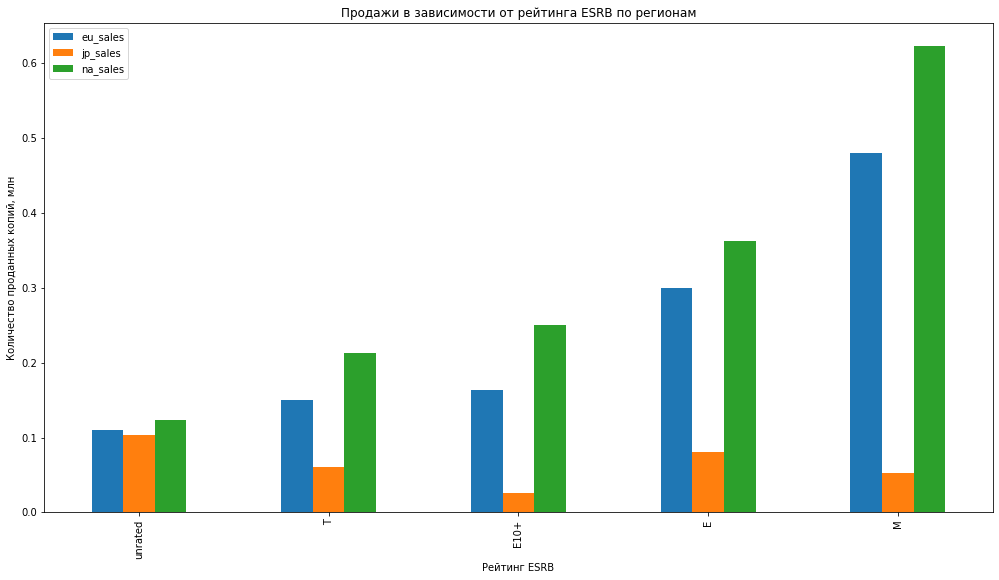

In [ ]:
(
    games_top.pivot_table(
        index='rating',
        values=['na_sales', 'eu_sales', 'jp_sales'],
        aggfunc='mean'
    )
    .sort_values(by='na_sales')
    .plot(
        kind='bar',
        figsize=(17, 9),
        title='Продажи в зависимости от рейтинга ESRB по регионам',
        ylabel='Количество проданных копий, млн',
        xlabel='Рейтинг ESRB'
    )
)

В Европе и Северной Америке топ самых продаваемых игр приходится на игры с рейтингом "М" — для взрослых (старше 16 лет). Затем идут игры с рейтингом "E" — игры подходящие для пользователей всех возрастов. Следом идут игры с рейтингом "E10+" — в основном подходящие для возраста 10 лет и старше. Последние в спике игры с рейтингом "T" — игры по возрастным ограничениям подходящие для "тинейджеров" 13 лет и старше.<br/>
В Японии игры промаркированные организацией ESRB особой популярностью не пользуются. Т.к. возможно, имеется свой собственный регулятор в области маркировки контента. И большей популярностью пользуются собсвенные игры выпущенные для Японского рынка.

**Вывод:**<br/>
Региональные предпочтения влияют на популярность жанров и платформ:<br/>
Портрет пользователя:

- Геймер из Европы предпочитает консоли от компании Sony: PlayStation 3 (29.2%) или 4 (25.2%). Наиболее популярный жанр игр у европейцев Action (30.7%), затем по низходящей идут Shooter (23.9%) и Sports (13.8%). Возрастной рейтинг игр в основном "M" (для взрослых).
- Игроки из Японии отдают предпочтения отечественным консолям от Nintendo, в частности Nintendo 3Ds (55.1%). Среди жанров выбираютРолевые игры -  Role-Playing (31.4%) и Action (27.2%). При этом игры с возрастной маркировкой от ESRB не пользуются большой популярностью, что может объясняться наличием собственного регулятора в области маркировки контента.
- Геймеры из Северной Америки выбирают уже консоли от Microsoft и Sony: Xbox 360 (31.6%) и PlayStation 3 (23.4%). В топ-3 жанров у геймеров входят Action (28.1%), Shooter (25.6%) и Sports (13.9%). Самый популярный возрастной рейтин для игр, так же как и в европе - "M" (для взрослых).

## Проверка гипотез

### Гипотеза: "Средние пользовательские рейтинги игр для платформ Xbox One и PC одинаковые"

Подсчитаем средние оценки пользователей игр для платформ Xbox One и PC за актуальный период (2011-2016).

In [ ]:
# Снова зададим актуальный период, но теперь обойдёмся без фильтрации по платформам.
games_actual = games.query(
    'year_of_release >= 2011'
)
# Посчитаем среднюю оценку пользователей для игр на PC и Xbox One.
games_xone_pc = games_actual.query('platform in ["XOne", "PC"] & user_score != -1').pivot_table(index='platform', values='user_score')
games_xone_pc

,user_score
platform,
PC,6.451792
XOne,6.521429


Построим распределение оценок пользователей для Xbox One

Text(0, 0.5, 'Количество оценок')

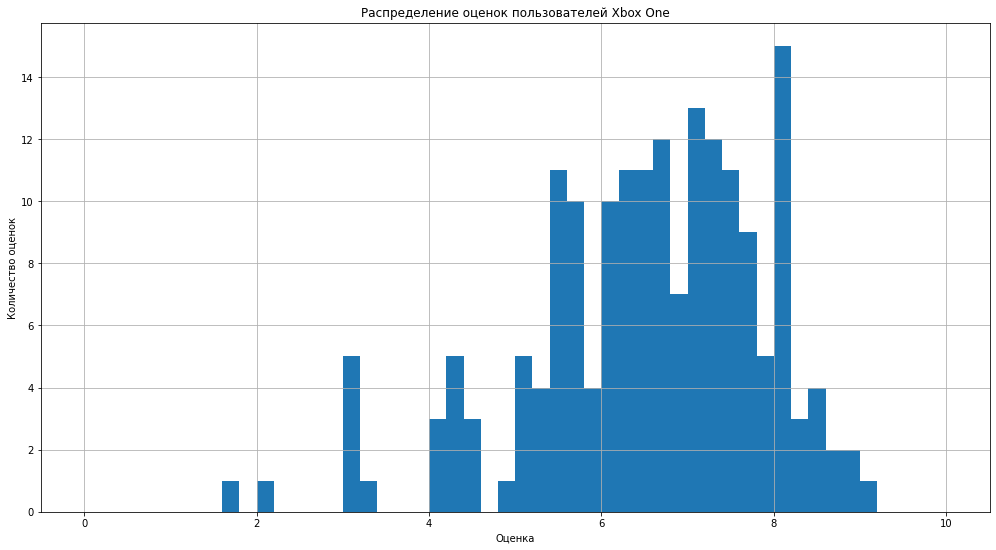

In [ ]:
# Фильтрация данных для платформы "XOne" и исключение недействительных оценок(заглушек)
games_xone = games_actual.query('platform == "XOne" & user_score != -1')['user_score']

# Построение гистограммы
ax = games_xone.plot(
    kind='hist',
    bins=50,
    range=(0, 10),
    grid=True,
    figsize=(17, 9),
    title='Распределение оценок пользователей Xbox One'
)

ax.set_xlabel('Оценка')
ax.set_ylabel('Количество оценок')

In [ ]:
# Посмотрим краткий обзор числовых данных.
games_xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Построим распределение оценок пользователей для PC.

Text(0, 0.5, 'Количество оценок')

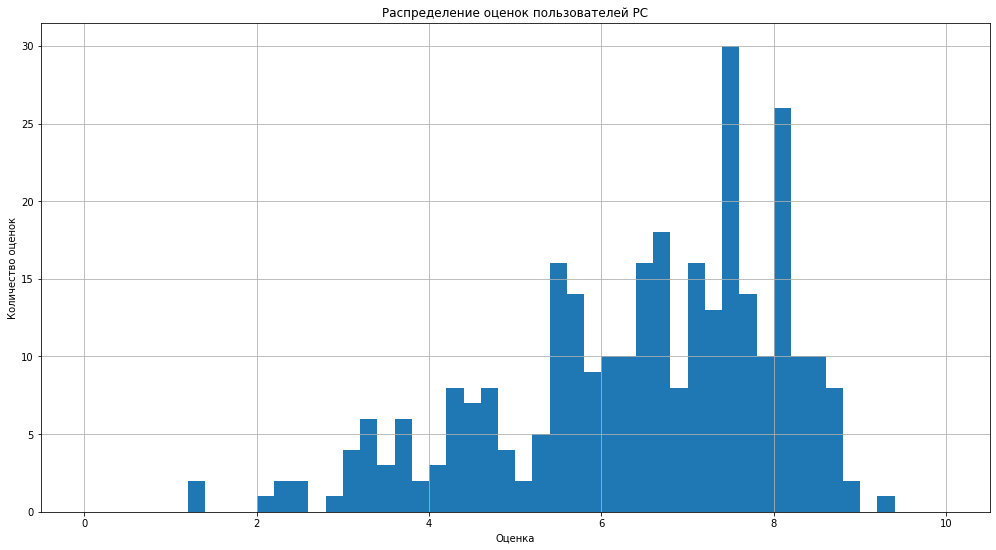

In [ ]:
# Фильтрация данных для платформы "PC" и исключение недействительных оценок(заглушек)
games_pc = games_actual.query('platform == "PC" & user_score != -1')['user_score']

# Построение гистограммы
ax = games_pc.plot(
    kind='hist',
    bins=50,
    range=(0, 10),
    grid=True,
    figsize=(17, 9),
    title='Распределение оценок пользователей PC'
)
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество оценок')

In [ ]:
# Посмотрим краткий обзор числовых данных.
games_pc.describe()

count    307.000000
mean       6.451792
std        1.611303
min        1.400000
25%        5.550000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Оценок игр на ПК в два раза больше, чем оценок на Xbox One. Оценки на ПК больше сгруппированы в диапазоне от 7 до 9 баллов. Кажется, что оценки для обех платформ немного различаются.

Проверим, отличаются ли средние пользовательские рейтинги игр для платформ Xbox One и PC.
Введём основную и альтернативную гипотезы:
- H0 — Средние пользовательские рейтинги игр для платформ Xbox One и PC одинаковые;
- H1 — Средние пользовательские рейтинги игр для платформ Xbox One и PC не одинаковые.

Уровень статистической значимости: 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.
Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind.<br/>
Если p-value будет меньше выбранного уровня значимости 0.05, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [ ]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(
    games_actual[(games_actual.platform == "XOne") & (games_actual.user_score != -1) & (games_actual.user_score.notna())]['user_score'],
    games_actual[(games_actual.platform == "PC") & (games_actual.user_score != -1) & (games_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

display(
    games_actual.query('platform in ["XOne", "PC"] & user_score != -1')
    .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median', 'var'])
)

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


,count,mean,median,var
,user_score,user_score,user_score,user_score
platform,,,,
PC,307,6.451792,6.8,2.596296
XOne,182,6.521429,6.8,1.906997


**Вывод:**<br/>
Различие средних значений статистически не значимо: средние пользовательские рейтинги игр для платформ Xbox One и PC в актуальный период - одинаковые.

### Гипотеза: "Средние пользовательские рейтинги игр в жанрах Action  и Sports разные."

Подсчитаем средние пользовательские оценки игр в жанрах Action и Sports за актуальный период (2011-2016).

In [ ]:
# Посчитаем среднюю оценку пользователей для игр в жанрах Action и Sports.
games_genres = games_actual.query('genre in ["Action", "Sports"] & user_score != -1').pivot_table(index='genre', values='user_score')
games_genres

,user_score
genre,
Action,6.775904
Sports,5.651429


Построим распределение оценок пользователей для игр в жанре Action

Text(0, 0.5, 'Количество оценок')

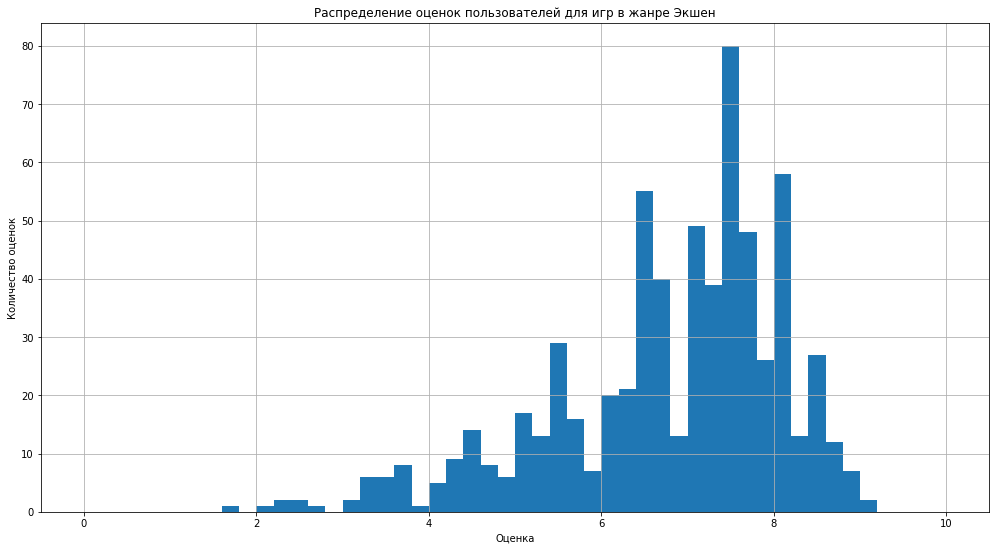

In [ ]:
# Фильтрация данных для игр в жанре "Action" и исключение недействительных оценок(заглушек)
games_action = games_actual.query('genre == "Action" & user_score != -1')['user_score']

# Построение гистограммы
ax = games_action.plot(
    kind='hist',
    bins=50,
    range=(0, 10),
    grid=True,
    figsize=(17, 9),
    title='Распределение оценок пользователей для игр в жанре Экшен'
)

ax.set_xlabel('Оценка')
ax.set_ylabel('Количество оценок')

In [ ]:
# Посмотрим краткий обзор числовых данных.
games_action.describe()

count    664.000000
mean       6.775904
std        1.346060
min        1.600000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Построим распределение оценок пользователей для игр в жанре Sports

Text(0, 0.5, 'Количество оценок')

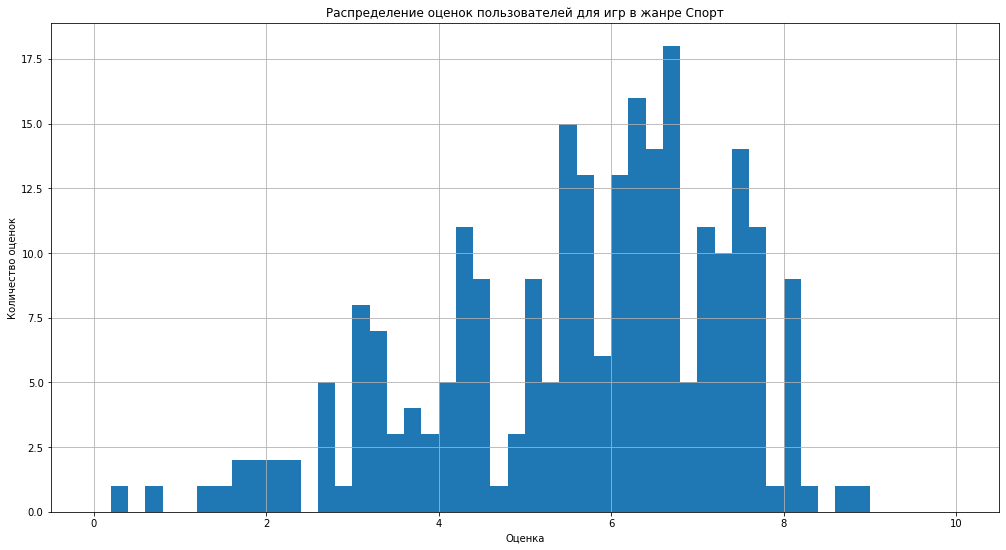

In [ ]:
# Фильтрация данных для игр в жанре "Sports" и исключение недействительных оценок
games_sports = games_actual.query('genre == "Sports" & user_score != -1')['user_score']

# Построение гистограммы
ax = games_sports.plot(
    kind='hist',
    bins=50,
    range=(0, 10),
    grid=True,
    figsize=(17, 9),
    title='Распределение оценок пользователей для игр в жанре Спорт'
)

ax.set_xlabel('Оценка')
ax.set_ylabel('Количество оценок')

In [ ]:
# Посмотрим краткий обзор числовых данных.
games_sports.describe()

count    245.000000
mean       5.651429
std        1.701244
min        0.200000
25%        4.400000
50%        6.000000
75%        6.900000
max        8.800000
Name: user_score, dtype: float64

Проверим, отличаются ли средние пользовательские рейтинги жанров Экшен и Спорт.
Введём основную и альтернативную гипотезы:
- H0 — Средние пользовательские рейтинги игр в жанрах Action и Sports одинаковые;
- H1 — Средние пользовательские рейтинги игр в жанрах Action и Sports не одинаковые.

Уровень статистической значимости: 0.05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок. Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind.
Если p-value будет меньше выбранного уровня значимости 0.05, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [ ]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(
    games_actual[(games_actual.genre == "Action") & (games_actual.user_score != -1) & (games_actual.user_score.notna())]['user_score'],
    games_actual[(games_actual.genre == "Sports") & (games_actual.user_score != -1) & (games_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

display(
    games.query('genre in ["Action", "Sports"] & user_score != -1')
    .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median', 'var'])
)

p-значение: 6.700647490667088e-24
Отвергаем нулевую гипотезу


,count,mean,median,var
,user_score,user_score,user_score,user_score
genre,,,,
Action,1796,7.058129,7.4,2.027494
Sports,1080,6.952778,7.4,2.623533


**Вывод:**<br/>
Различие средних значений статистически значимо: средние пользовательские рейтинги игр в жанрах Action и Sports в актуальный период - не одинаковые.

## Общий вывод

В рамках исследования мы анализировали данные о видеоиграх, выпущенных с 1980 по 2016 год на различных платформах, включая консоли и персональные компьютеры.<br/>
Целью работы было выявить закономерности, которые определяют успешность игры, что позволит прогнозировать продажи в 2017 году и эффективно планировать маркетинговые кампании.<br/>

В ходе анализа данных были пройдены следующие шаги и выполнены работы:<br/>
- **Изучена общая информация о датафрейме:**<br/>
 - Датафрейм состоит из 16715 записей и 11 стобцов с данными.
 - Уже в первых десяти строках датафрейма обнаружено большое количество пропусков в столбцах *Critic_Score*, *User_Score*,	*Rating*.
 - В столбце *Year_of_Release* неправильный тип данных (**float64**), необходимо преобразовать тип данных к целочисленному (**int**).
 - Столбец *User_Score* имеет тип данных (**object**), согласно наполнению столбца необходимо преобразовать к (**float64**).

- **Проведена подготовка данных:**<br/>
 - Названия столбцов приведены к нижнему регистру.
 - Пропуски в столбцах *name* и *year_of_release* удалены, так как отсутствие этих данных делает их использование невозможным.
 - Пропуски в столбцах *critic_score* и *user_score* заполнены индикаторным значением-заглушкой (-1) для сохранения возможности их использования в дальнейшем анализе. Значение "tbd" в *user_score* также интерпретировано как пропуск и заменено индикатором.
 - Пропуски в столбце *rating* заполнены значением "unrated", что соответствует отсутствию рейтинга.
 - Тип данных столбца *year_of_release* изменен на целочисленный (**int**), так как этот столбец содержит только год и не требует дробной части.
 - Проведена проверка на наличие явных и не явных дубликатов. Из двух найденых неявных дубликатов оставлен один.
 - Тип данных столбца *user_score* изменен с (**object**) на (**float**), поскольку значения содержат дробную часть.
 - Добавлен столбец *total_sales* с суммарными продажами во всех регионах.
Пропуски в столбцах *name* и *year_of_release* могли возникнуть из-за технического сбоя при выгрузке данных или вследствие человеческой ошибки.
Часть пропущенных значений в *critic_score* и *user_score* также могла быть вызвана техническими сбоями, но возможно, что игры с отсутствующими оценками не привлекли внимание критиков и пользователей.

- **Проведён исследовательский анализ данных:**<br/>
Исследовательский анализ данных дал нам следующую информацию о исторических данных:
 - До 1994 года выпускалось менее 60 игр в год, но с 1994 года количество релизов резко возросло, достигнув пика в 2008-2009 годах с более чем 1400 играми в год. После 2012 года количество игр начало сокращаться, что, вероятно, связано с переходом на мобильные платформы и изменением стратегий разработчиков.
 - К лидерам по продажам за актуальный период (2011-2016 гг.) относятся платформы От Sony: PS4, PS3, и от Microsoft — X360. Затем идут Nintendo 3Ds, WiiU и XBoxOne
 - Жизненный цикл платформы составляет примерно 10 лет.
 - Платформы находящиеся на пике популярности на конец периода: PlayStation 4, XBox One.Остальные платформы уже успели преодолеть пик своей популярности: 3D, PS3, WiiU, X360.
 - В топ по суммарным продажам вошли Экшены, Шутеры и Спортивные игры, а наименьшие продажи у Приключений, Стратегий и Головоломок.
 - По средним продажам лидируют Шутеры, Платформеры и Спортивные игры.

- **Составлен портрет пользователя для каждого региона:**<br/>
 - Геймер из Европы предпочитает консоли от компании Sony: PlayStation 3 (29.2%) или 4 (25.2%). Наиболее популярный жанр игр у европейцев Action (30.7%), затем по низходящей идут Shooter (23.9%) и Sports (13.8%). Возрастной рейтинг игр в основном "M" (для взрослых).
 - Игроки из Японии отдают предпочтения отечественным консолям от Nintendo, в частности Nintendo 3Ds (55.1%). Среди жанров выбираютРолевые игры - Role-Playing (31.4%) и Action (27.2%). При этом игры с возрастной маркировкой от ESRB не пользуются большой популярностью, что может объясняться наличием собственного регулятора в области маркировки контента.
 - Геймеры из Северной Америки выбирают уже консоли от Microsoft и Sony: Xbox 360 (31.6%) и PlayStation 3 (23.4%). В топ-3 жанров у геймеров входят Action (28.1%), Shooter (25.6%) и Sports (13.9%). Самый популярный возрастной рейтин для игр, так же как и в европе - "M" (для взрослых).

- **Проверены гипотезы:**<br/>
 - Средние пользовательские рейтинги игр для платформ Xbox One и PC в актуальный период - одинаковые.
 - Средние пользовательские рейтинги игр в жанрах Action и Sports в актуальный период - не одинаковые.

На основе анализа данных мы выяснили, что в 2017 году наибольший потенциал для успеха имеют игры на платформах PlayStation 4 и Xbox One, особенно если они относятся к жанрам экшенов, шутеров или спортивных игр. Примечательно, что предпочтения пользователей варьируются в зависимости от региона, что важно учитывать при разработке и маркетинге игр. Важной особенностью также является то, что продажи игр сильнее коррелируют с оценками критиков, чем с пользовательскими оценками. При этом оценки пользователей зависят не от платформы, а от жанра.